### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import  train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
from mlxtend.plotting import plot_decision_regions

In [18]:
df1=pd.read_csv(r"D:\Multiple CSV\Multiple CSV\8.twospirals.csv",header=None)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2000 non-null   float64
 1   1       2000 non-null   float64
 2   2       2000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


In [19]:
#df1[2]=df1[2].astype("int32")
df1[2].unique()
df1

0          1  2
0    -2.543456 -10.816358  0
1     9.434466  -2.572000  0
2     3.368646 -10.194671  0
3     1.341407  -4.204140  0
4     9.547758  -2.220580  0
...        ...        ... ..
1995 -3.213608   1.543994  1
1996  5.577210   2.359087  1
1997 -1.393598  -7.876754  1
1998 -7.708972  -4.298002  1
1999  4.610779  10.629477  1

[2000 rows x 3 columns]

In [20]:
fv=df1.iloc[:,:2]
cv=df1.iloc[: ,-1]

In [21]:
cv

0       0
1       0
2       0
3       0
4       0
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: 2, Length: 2000, dtype: int64

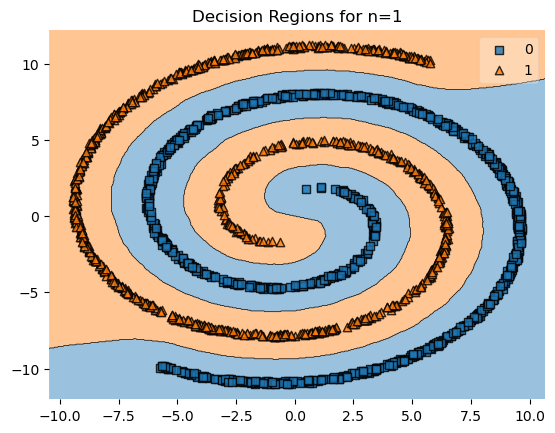

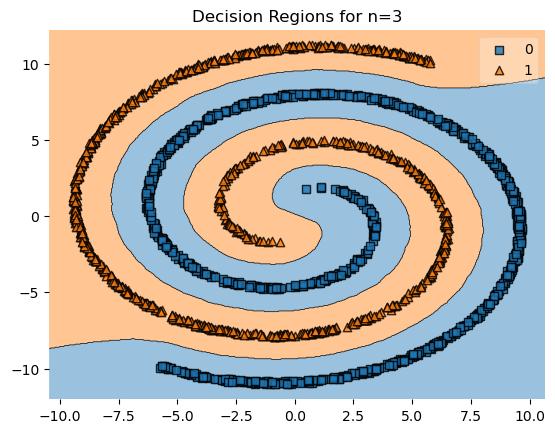

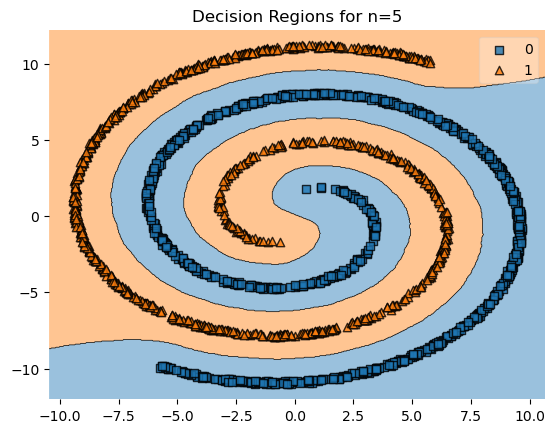

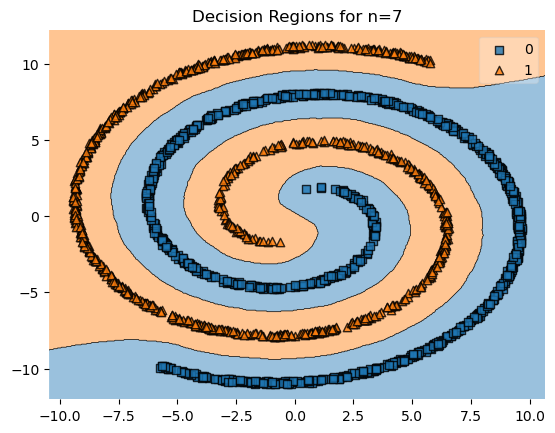

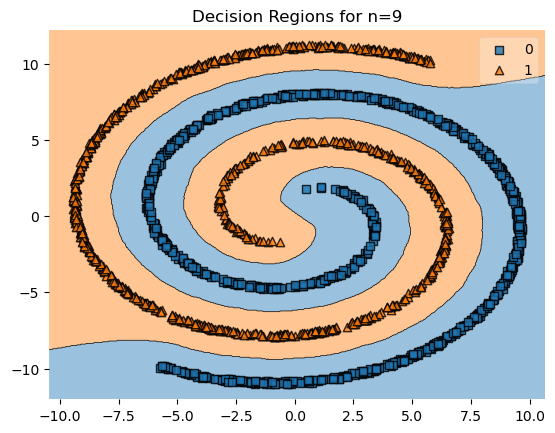

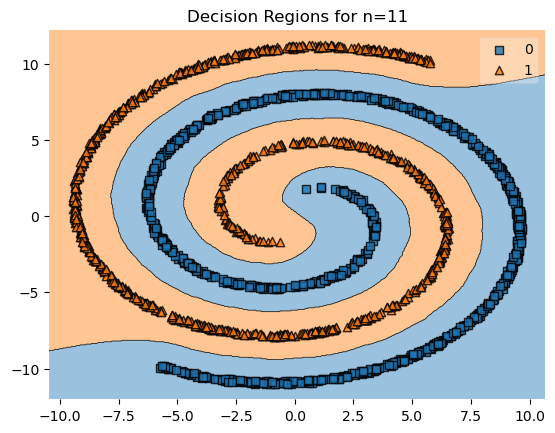

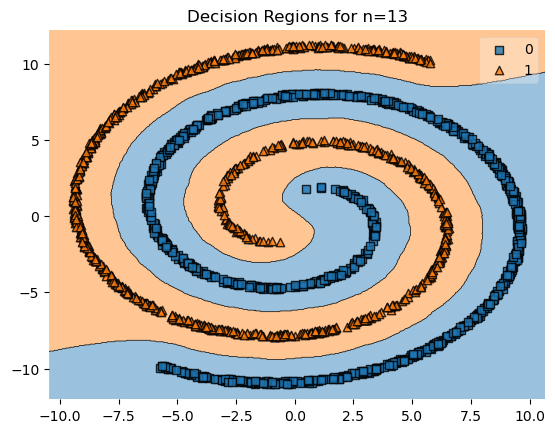

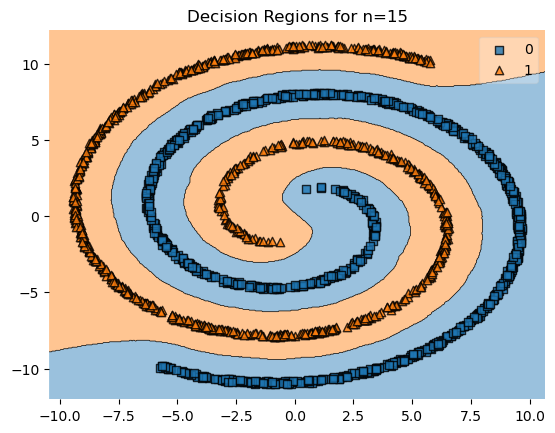

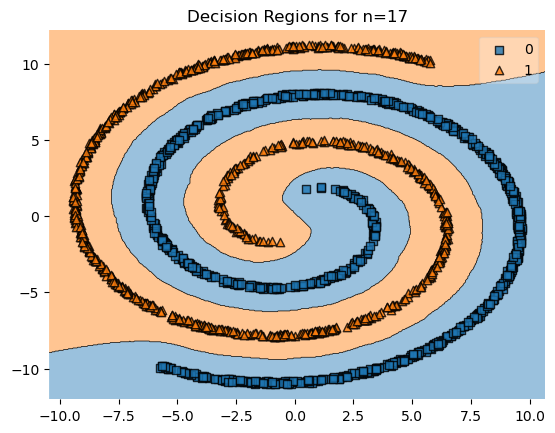

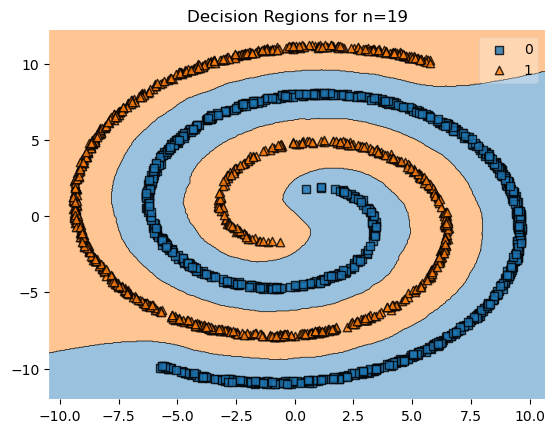

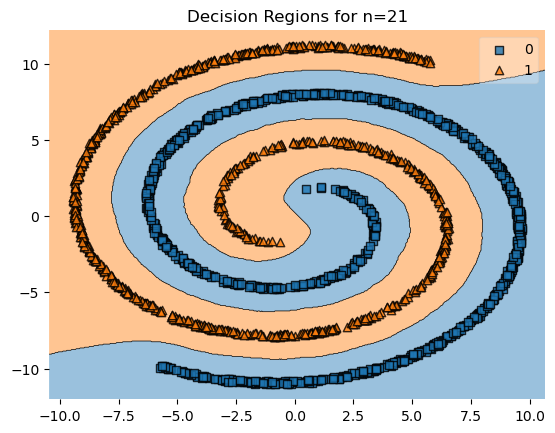

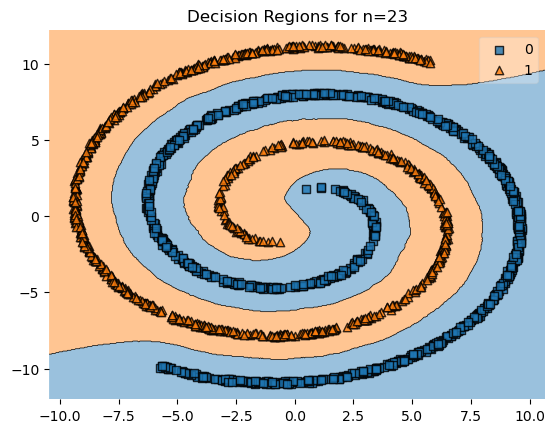

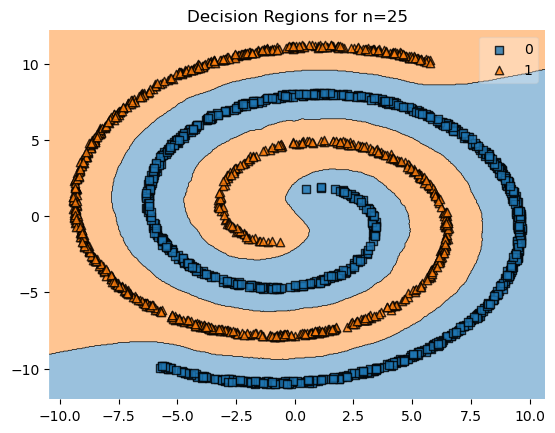

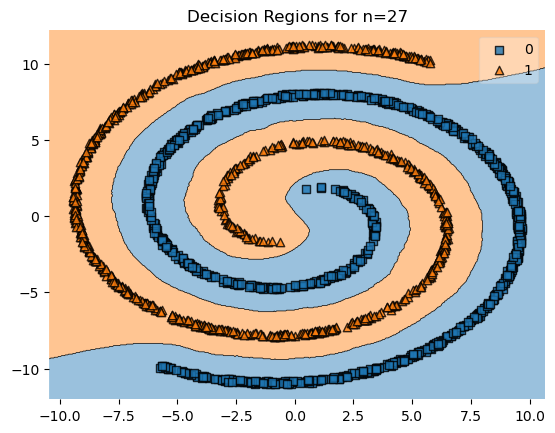

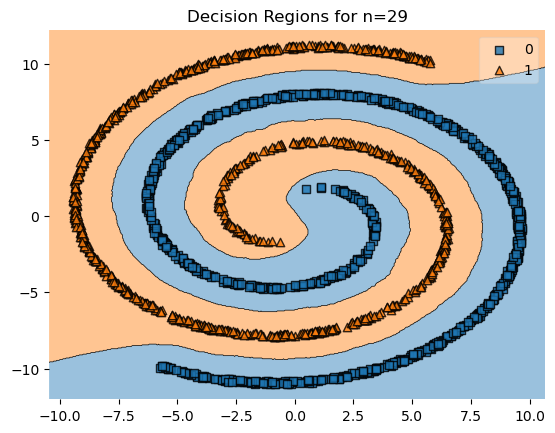

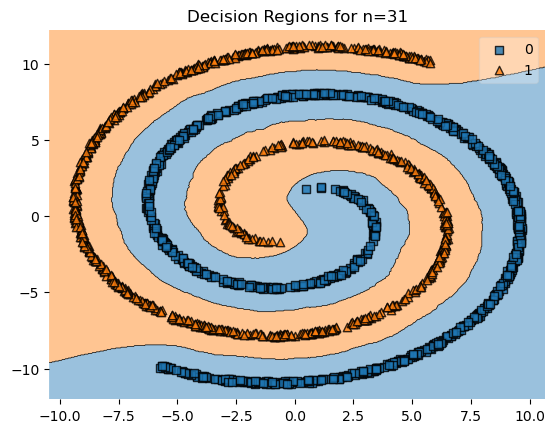

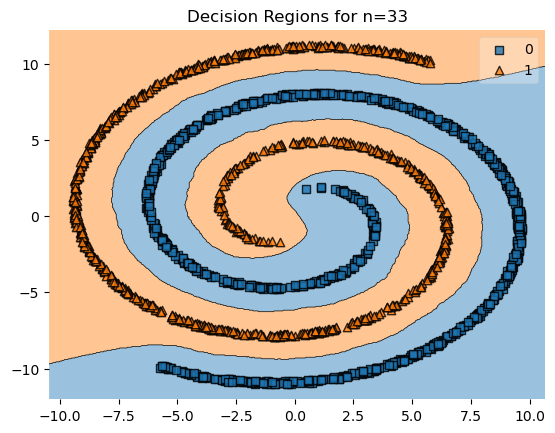

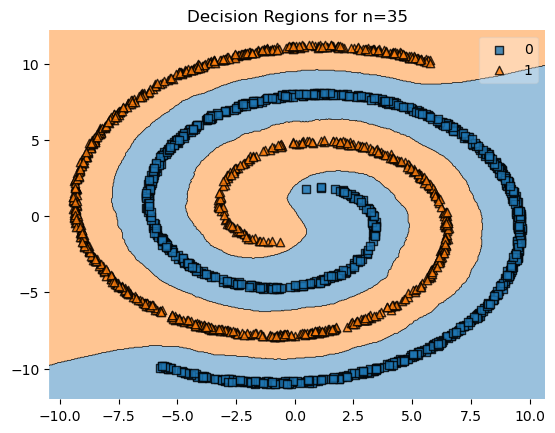

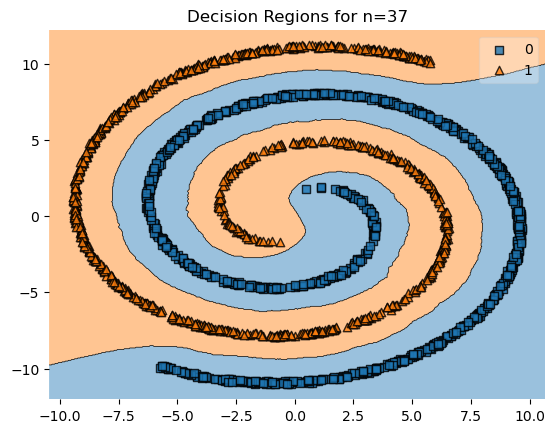

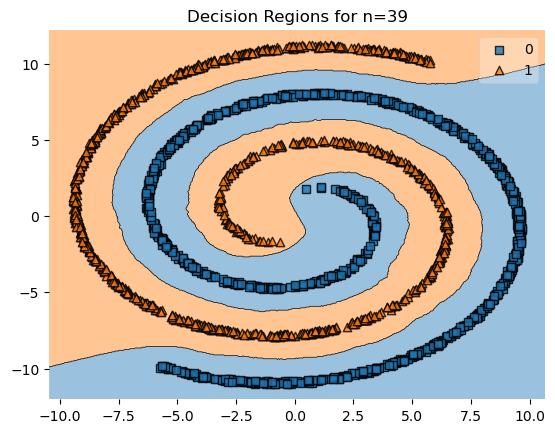

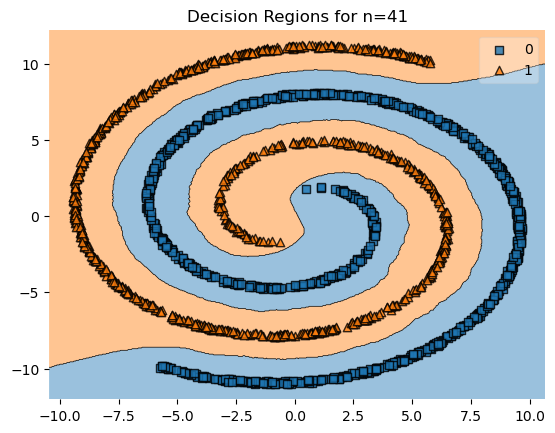

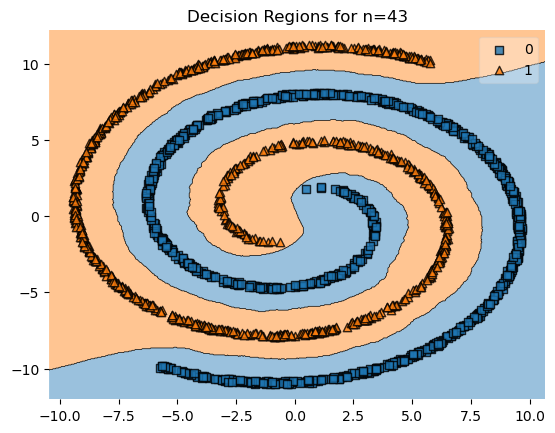

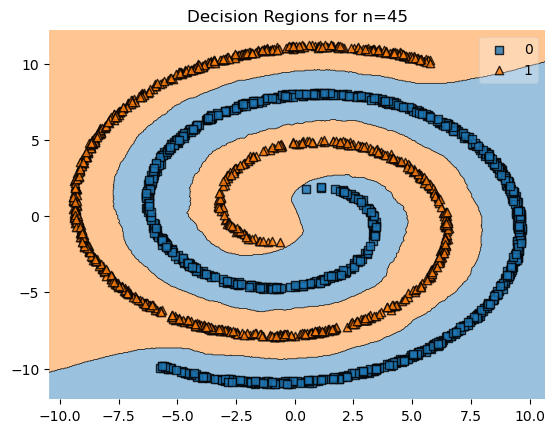

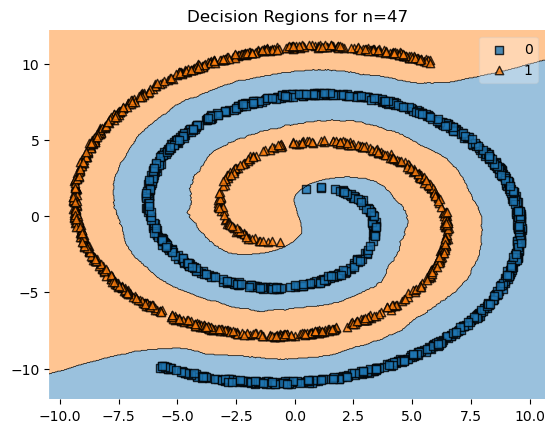

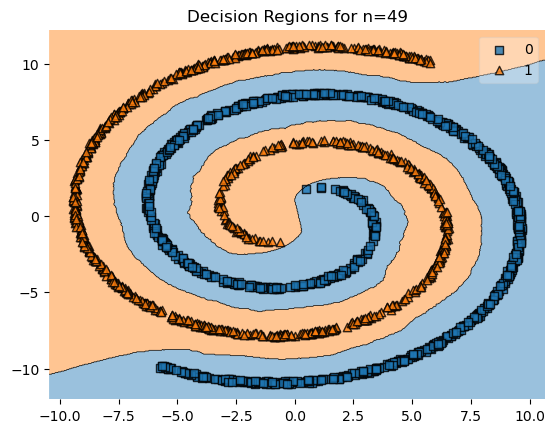

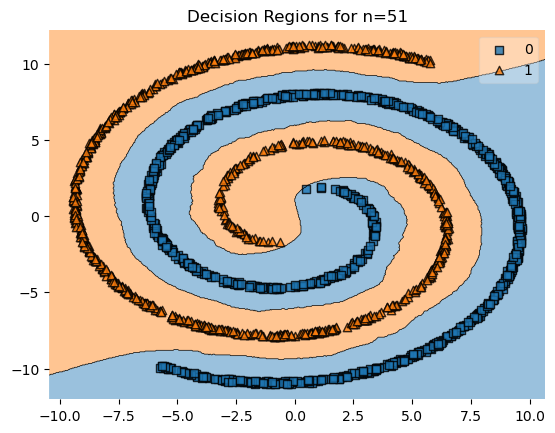

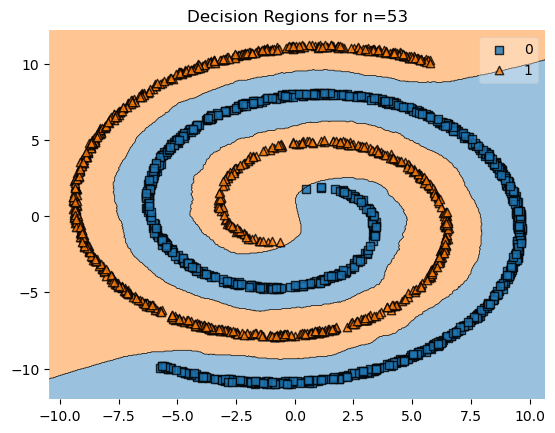

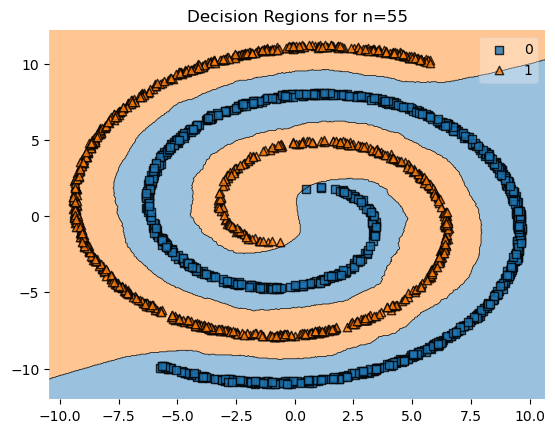

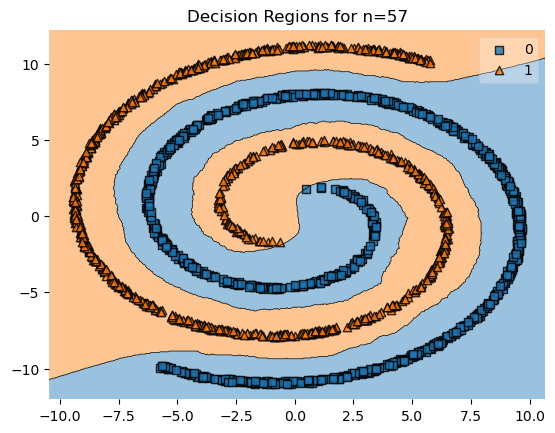

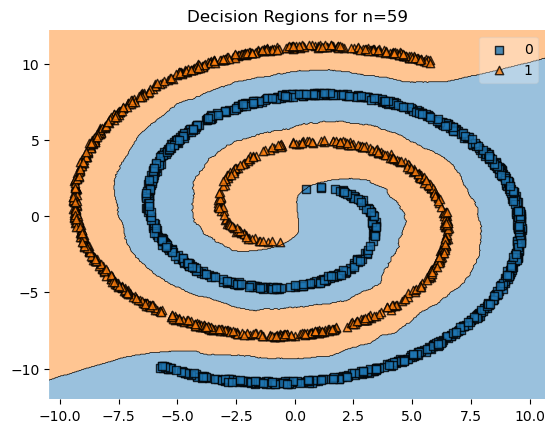

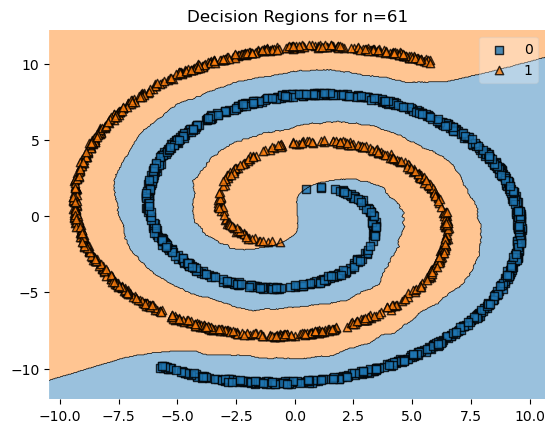

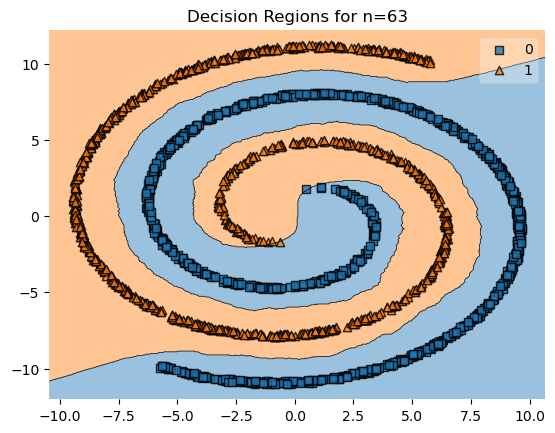

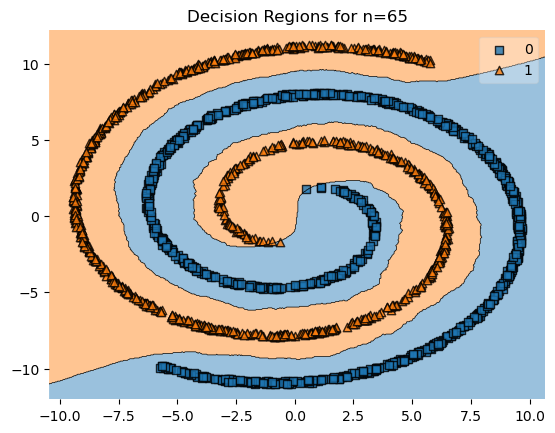

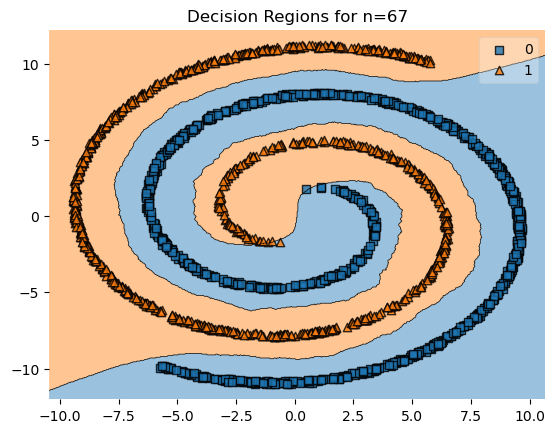

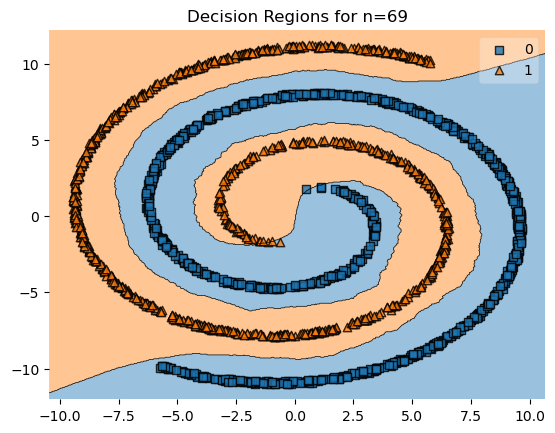

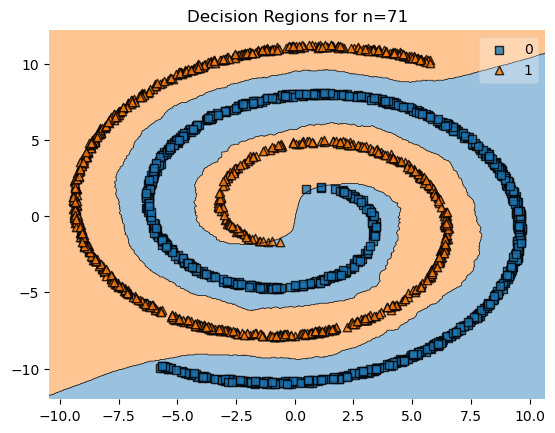

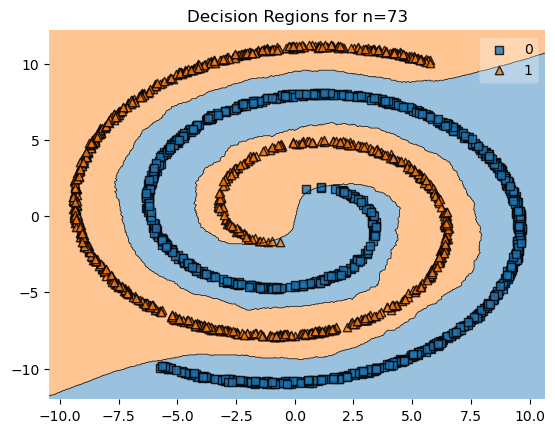

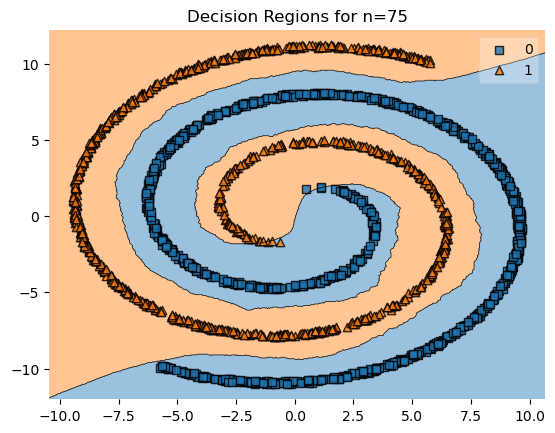

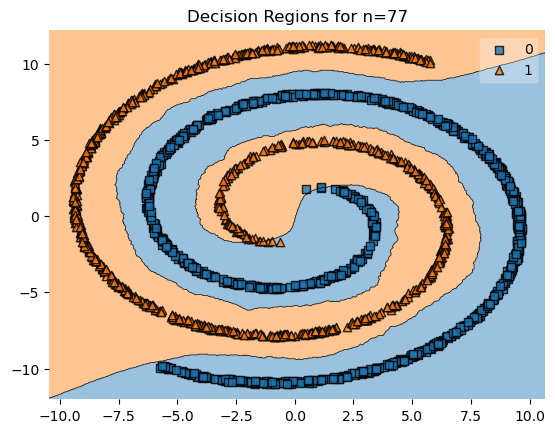

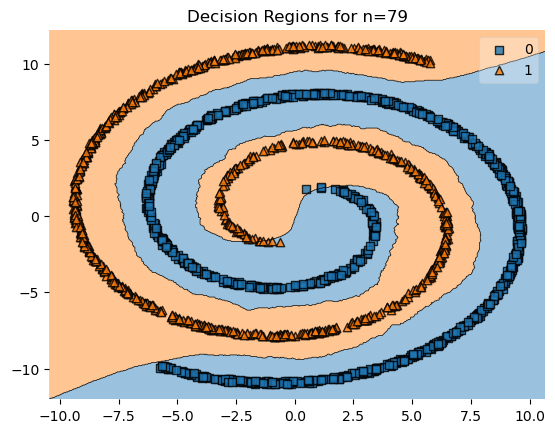

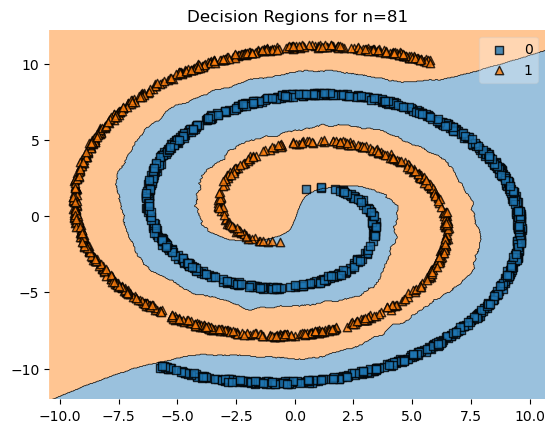

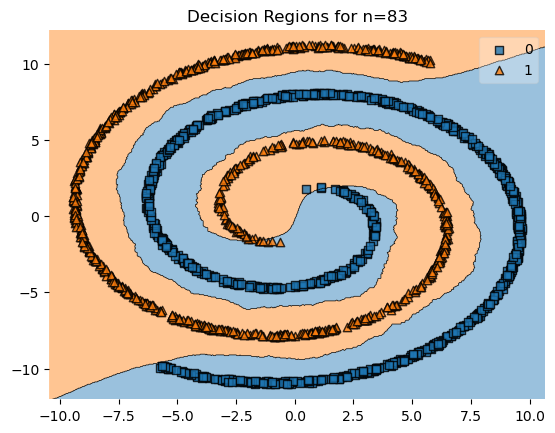

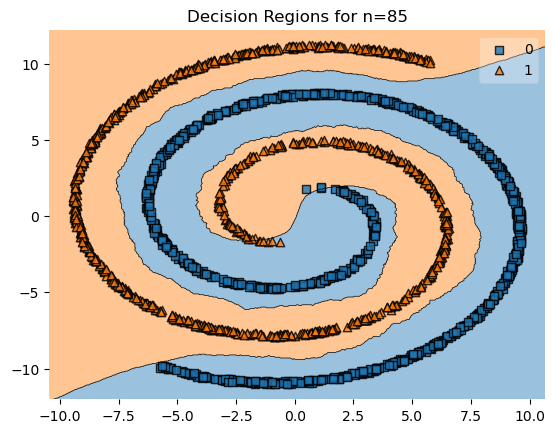

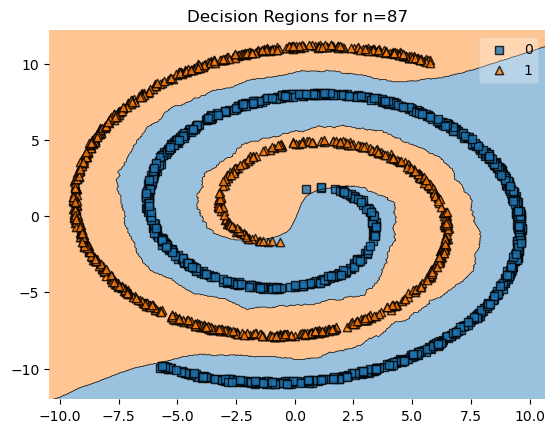

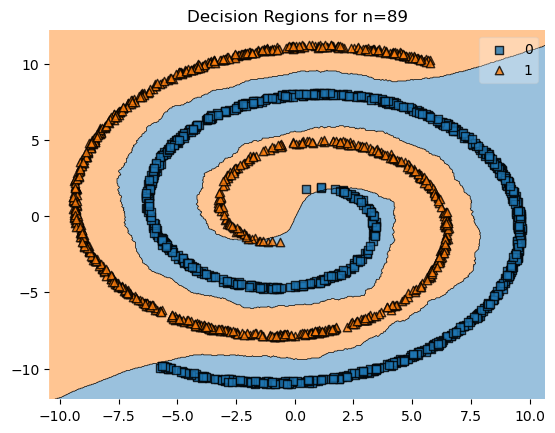

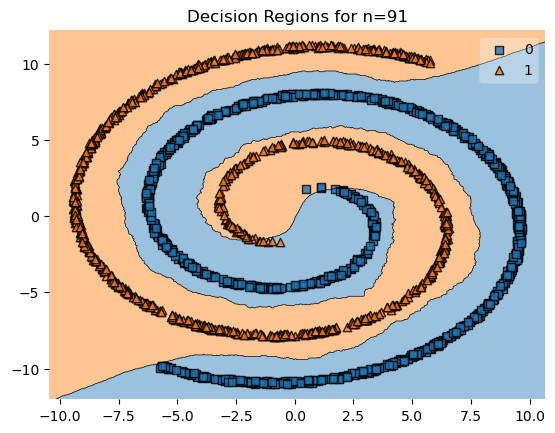

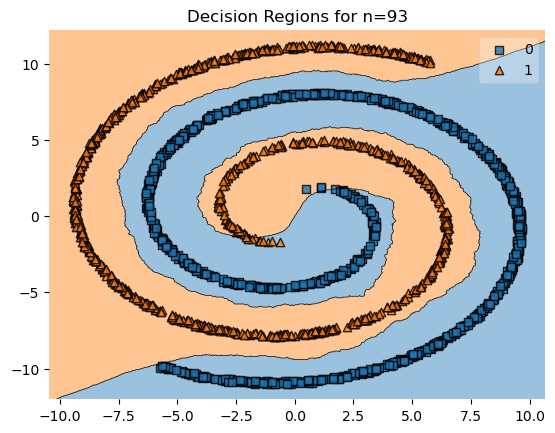

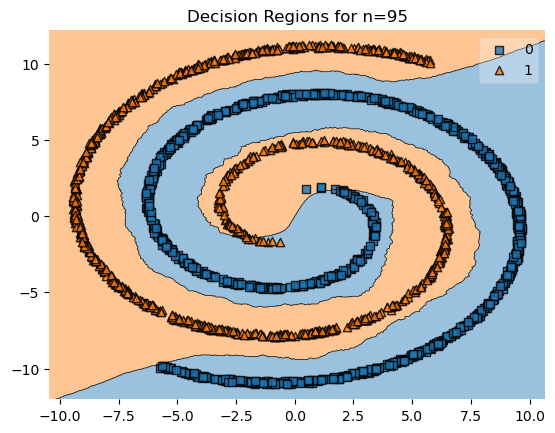

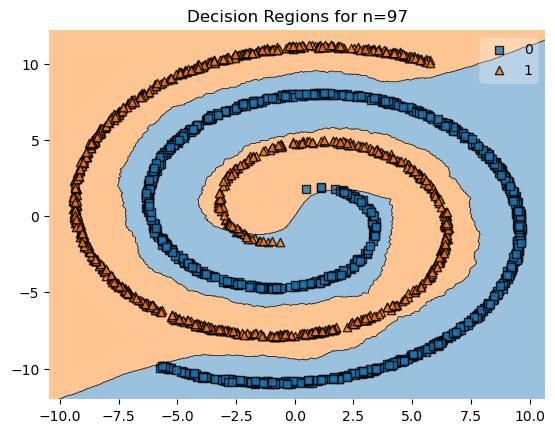

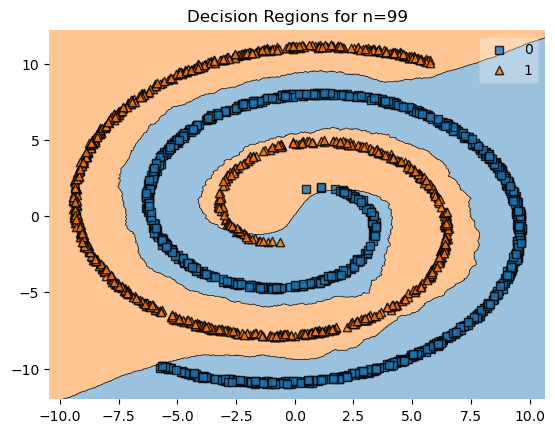

In [22]:
for n in range(1,100,2):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(fv,cv)
    plot_decision_regions(X=fv.values,y=cv.values,clf=knn)
    plt.title(f'Decision Regions for n={n}')
    plt.show()

In [8]:
df1=pd.read_csv(r"D:\Multiple CSV\Multiple CSV\8.twospirals.csv",header=None)
fv=df1.iloc[:,:2]
cv=df1.iloc[: ,-1]
df1


0          1  2
0    -2.543456 -10.816358  0
1     9.434466  -2.572000  0
2     3.368646 -10.194671  0
3     1.341407  -4.204140  0
4     9.547758  -2.220580  0
...        ...        ... ..
1995 -3.213608   1.543994  1
1996  5.577210   2.359087  1
1997 -1.393598  -7.876754  1
1998 -7.708972  -4.298002  1
1999  4.610779  10.629477  1

[2000 rows x 3 columns]

In [9]:
X_train,X_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=42,stratify=cv)
knn=KNeighborsClassifier(n_neighbors=1)
model=knn.fit(X_train,y_train)
predicted=model.predict(X_test)

In [10]:
x_trinf,x_testf,cv_train,cv_test=train_test_split(X_train,y_train,test_size=0.1,random_state=42,stratify=y_train)

In [12]:

x_trinf = np.ascontiguousarray(x_trinf)
cv_train = np.ascontiguousarray(cv_train)
x_testf = np.ascontiguousarray(x_testf)

In [14]:
k=[]
acc=[]
err=[]
for n in range(1,1440,2):
    knn=KNeighborsClassifier(n_neighbors=n)
    model=knn.fit(x_trinf,cv_train)
    predicted=model.predict(x_testf)

    k.append(n)
    acc.append(accuracy_score(cv_test,predicted))
    err.append(1-accuracy_score(cv_test,predicted))

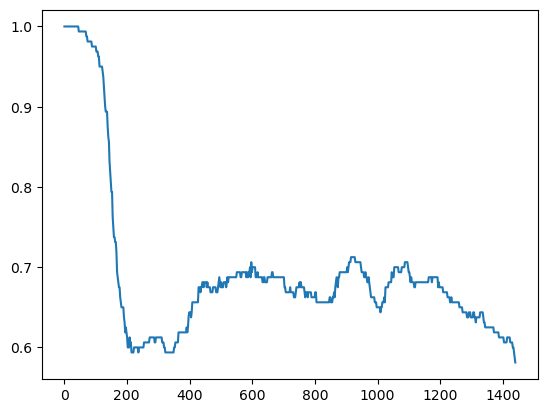

In [15]:
plt.plot(k,acc)
plt.show()

In [16]:
### select one from most accuray k value 

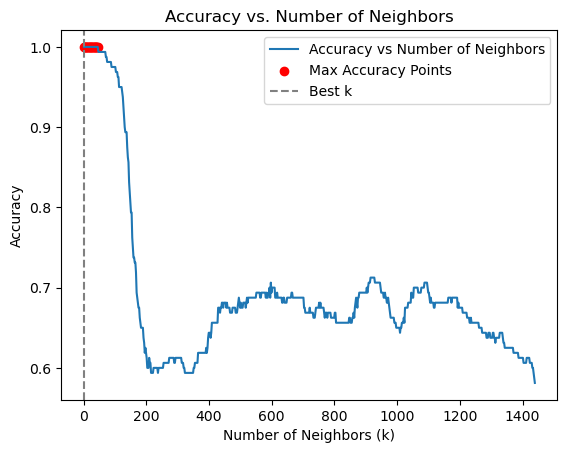

In [17]:
max_acc_indices = [i for i, j in enumerate(acc) if j == max(acc)]

# Plotting the graph
plt.plot(k, acc, label='Accuracy vs Number of Neighbors')
plt.scatter([k[i] for i in max_acc_indices], [acc[i] for i in max_acc_indices], color='red', marker='o', label='Max Accuracy Points')
plt.axvline(x=k[max_acc_indices[0]], color='gray', linestyle='--', label='Best k')  # Assuming the first max index for vertical line

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.legend()
plt.show()